In [3]:
from pyedflib import highlevel
import numpy as np
import matplotlib.pyplot as plt

path = "S001R03.edf"
signals, signal_headers, header = highlevel.read_edf(path)
fs = signal_headers[0]['sample_frequency']  # Sampling rate (Hz)
channel_names = [h['label'] for h in signal_headers]  # List of channel names

print(f"Sampling rate: {fs} Hz")
print(f"Channels: {channel_names}")
print(f"Signal shape: {signals.shape}")  # (n_channels, n_samples)

Sampling rate: 160.0 Hz
Channels: ['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']
Signal shape: (64, 20000)


In [4]:
# Find indices of C3 and C4
c3_idx = channel_names.index('C3..')
c4_idx = channel_names.index('C4..')

c3_signal = signals[c3_idx, :]
c4_signal = signals[c4_idx, :]

In [5]:
from scipy.signal import butter, filtfilt

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# Filter C3 and C4
c3_filtered = bandpass_filter(c3_signal, 0.5, 40, fs)
c4_filtered = bandpass_filter(c4_signal, 0.5, 40, fs)

# Optional: Notch filter (50 Hz)
def notch_filter(data, notch_freq, fs, quality=30):
    nyquist = 0.5 * fs
    freq = notch_freq / nyquist
    b, a = butter(2, [freq - 0.5/quality, freq + 0.5/quality], btype='bandstop')
    return filtfilt(b, a, data)

c3_filtered = notch_filter(c3_filtered, 50, fs)
c4_filtered = notch_filter(c4_filtered, 50, fs)

In [6]:
from scipy.signal import butter, filtfilt

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# Filter C3 and C4
c3_filtered = bandpass_filter(c3_signal, 0.5, 40, fs)
c4_filtered = bandpass_filter(c4_signal, 0.5, 40, fs)

# Optional: Notch filter (50 Hz)
def notch_filter(data, notch_freq, fs, quality=30):
    nyquist = 0.5 * fs
    freq = notch_freq / nyquist
    b, a = butter(2, [freq - 0.5/quality, freq + 0.5/quality], btype='bandstop')
    return filtfilt(b, a, data)

c3_filtered = notch_filter(c3_filtered, 50, fs)
c4_filtered = notch_filter(c4_filtered, 50, fs)

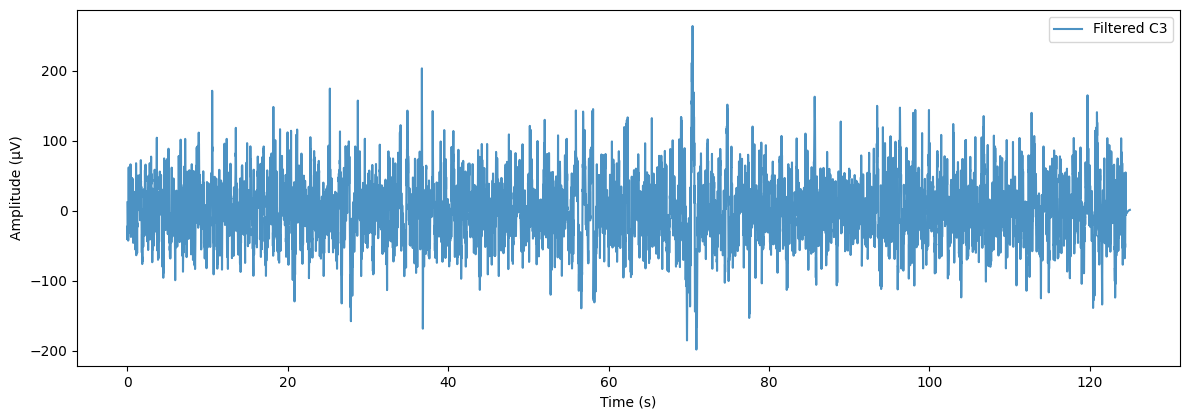

In [10]:
time = np.arange(0, len(c3_signal)) / fs

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
#plt.plot(time, c3_signal, label='Raw C3')
plt.plot(time, c3_filtered, label='Filtered C3', alpha=0.8)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend()

'''plt.subplot(2, 1, 2)
plt.plot(time, c4_signal, label='Raw C4')
plt.plot(time, c4_filtered, label='Filtered C4', alpha=0.8)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend()'''
plt.tight_layout()
plt.show()

In [11]:
from pyedflib import EdfReader
import numpy as np
import matplotlib.pyplot as plt

# Open the EDF file
file_path = "S001R03.edf"
reader = EdfReader(file_path)

# Get signal data and headers
n_channels = reader.signals_in_file
signal_labels = reader.getSignalLabels()
fs = reader.getSampleFrequency(0)  # Assumes all channels have same sample rate
signals = np.array([reader.readSignal(i) for i in range(n_channels)])

# Get annotations (events/timestamps)
annotations = reader.readAnnotations()

# Close the file
reader.close()

# Print annotations
print("Annotations (time in seconds, duration, description):")
for onset, duration, description in zip(annotations[0], annotations[1], annotations[2]):
    print(f"{onset:.2f}s - {duration}s: {description}")

# Example output:
# 2.00s - 0.00s: T0
# 4.00s - 0.00s: T1
# 6.00s - 0.00s: T2

Annotations (time in seconds, duration, description):
0.00s - 4.2s: T0
4.20s - 4.1s: T2
8.30s - 4.2s: T0
12.50s - 4.1s: T1
16.60s - 4.2s: T0
20.80s - 4.1s: T1
24.90s - 4.2s: T0
29.10s - 4.1s: T2
33.20s - 4.2s: T0
37.40s - 4.1s: T2
41.50s - 4.2s: T0
45.70s - 4.1s: T1
49.80s - 4.2s: T0
54.00s - 4.1s: T1
58.10s - 4.2s: T0
62.30s - 4.1s: T2
66.40s - 4.2s: T0
70.60s - 4.1s: T1
74.70s - 4.2s: T0
78.90s - 4.1s: T2
83.00s - 4.2s: T0
87.20s - 4.1s: T2
91.30s - 4.2s: T0
95.50s - 4.1s: T1
99.60s - 4.2s: T0
103.80s - 4.1s: T1
107.90s - 4.2s: T0
112.10s - 4.1s: T2
116.20s - 4.2s: T0
120.40s - 4.1s: T1


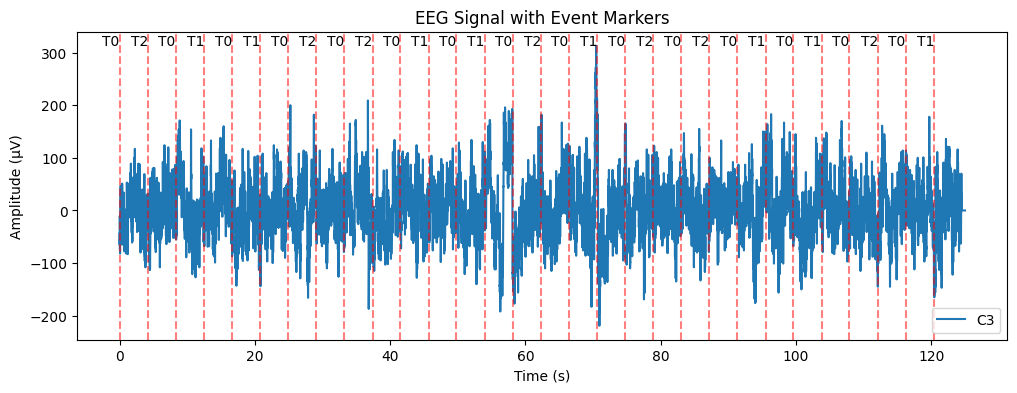

In [14]:
# Plot C3 signal with event markers
c3_idx = signal_labels.index('C3..')
c3_signal = signals[c3_idx]
time = np.arange(len(c3_signal)) / fs

plt.figure(figsize=(12, 4))
plt.plot(time, c3_signal, label='C3')
for onset, _, desc in zip(annotations[0], annotations[1], annotations[2]):
    plt.axvline(onset, color='red', linestyle='--', alpha=0.5)
    plt.text(onset, np.max(c3_signal), desc, ha='right')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.title('EEG Signal with Event Markers')
plt.legend()
plt.show()

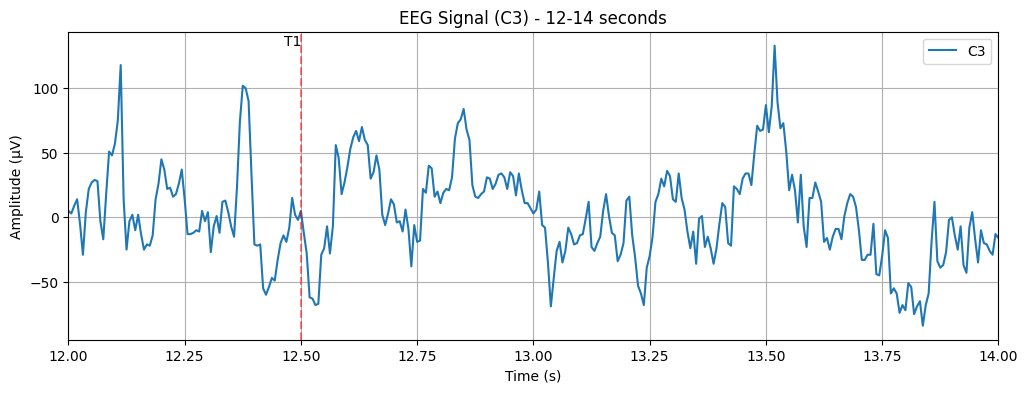

In [28]:
# Plot C3 signal with event markers (10-second window)
c3_idx = signal_labels.index('C3..')
c3_signal = signals[c3_idx]
time = np.arange(len(c3_signal)) / fs  # Create time axis in seconds

# Select a 10-second window (adjust start_time as needed)
start_time = 12
end_time = start_time + 2
window_mask = (time >= start_time) & (time <= end_time)

plt.figure(figsize=(12, 4))
plt.plot(time[window_mask], c3_signal[window_mask], label='C3')

# Plot only markers within this window
for onset, duration, desc in zip(annotations[0], annotations[1], annotations[2]):
    if start_time <= onset <= end_time:  # Only show markers in our window
        plt.axvline(onset, color='red', linestyle='--', alpha=0.5)
        plt.text(onset, np.max(c3_signal[window_mask]), desc, ha='right')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.title(f'EEG Signal (C3) - {start_time}-{end_time} seconds')
plt.legend()
plt.xlim(start_time, end_time)  # Force x-axis limits
plt.grid(True)
plt.show()